<img src="btc_ath_bottom.png" />

### Import Libs

In [342]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
from scipy.optimize import curve_fit

### Ciclos

In [343]:
primer_ath = 33
segundo_ath = 1249
tercer_ath = 20000
cuarto_ath = 67781

#### Vemos que en cada ciclo el ATH se incrementa cada ves menos con respecto al anterior

In [344]:
segundo_ath / primer_ath

37.84848484848485

In [345]:
tercer_ath / segundo_ath

16.01281024819856

In [346]:
cuarto_ath / tercer_ath

3.38905

#### Polinomio predictor (ATH)

Construyamos un polinomo que nos arroje cual seria el nuevo ATH tomando como datos los 4 ATH anteriores.

In [347]:
x = [1, 2, 3, 4]
maximos = [33, 1249, 20000, 67681]
poly_cicle_max = np.polynomial.Polynomial.fit(x, maximos, deg=3)
poly_cicle_max

Polynomial([ 7720.4375, 27414.3125, 26136.5625,  6409.6875], domain=[1., 4.], window=[-1.,  1.], symbol='x')

Probemos el polinomio con los valores que ya conocemos:

In [348]:
poly_cicle_max(1)

np.float64(32.999999999953616)

In [349]:
poly_cicle_max(2)

np.float64(1249.000000000021)

In [350]:
poly_cicle_max(3)

np.float64(20000.00000000003)

In [351]:
poly_cicle_max(4)

np.float64(67680.99999999997)

#### El nuevo ATH (ciclo 5)

In [352]:
poly_cicle_max(5)

np.float64(155686.99999999988)

#### Ratio de subida ciclo 5

In [353]:
poly_cicle_max(5) / poly_cicle_max(4)

np.float64(2.30030584654482)

#### El nuevo ATH (ciclo 6)

In [354]:
poly_cicle_max(6)

np.float64(295412.9999999998)

#### Ratio de subida ciclo 6

In [355]:
poly_cicle_max(6) / poly_cicle_max(5)

np.float64(1.8974802006590148)

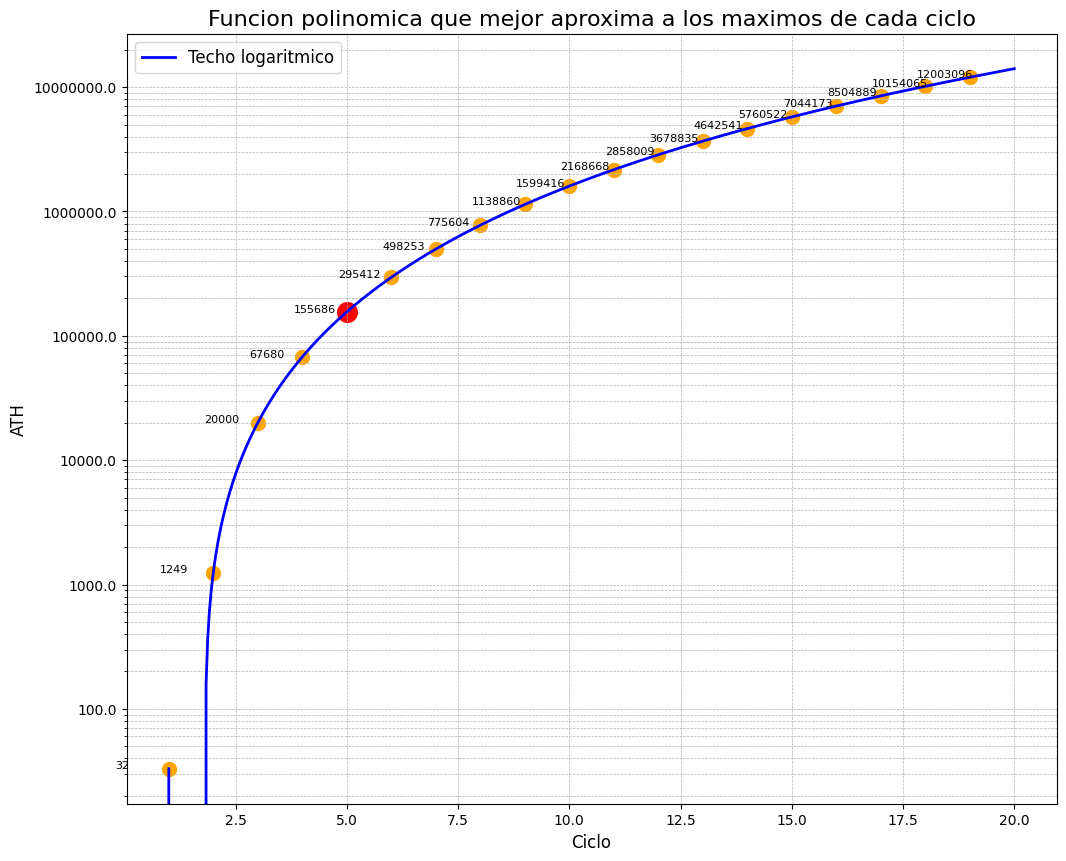

In [418]:
# Generar valores para la curva del polinomio
x_vals = np.linspace(1, 20, 500)  # Valores entre el ciclo 1 y 5
y_vals = poly_cicle_max(x_vals)  # Evaluación del polinomio de minimos

# Graficar ambos polinomios
plt.figure(figsize=(12, 10))  # Tamaño de la gráfica
plt.plot(x_vals, y_vals, label='Techo logaritmico', color='blue', linewidth=2)  # Línea de máximos

for cicle in range(1, 20):
    color = 'orange'
    size = 100
    if cicle == 5:
        color = 'red'
        size = 200
    plt.scatter(cicle, poly_cicle_max(cicle), s=size, color=color)
    plt.text(cicle - 1.2, poly_cicle_max(cicle), s=int(poly_cicle_max(cicle)), fontsize=8, color="black")

# Etiquetas y diseño
plt.title('Funcion polinomica que mejor aproxima a los maximos de cada ciclo', fontsize=16)
plt.xlabel('Ciclo', fontsize=12)
plt.ylabel('ATH', fontsize=12)

# Aplicar escala logarítmica en el eje Y
plt.yscale('log')
plt.legend(fontsize=12)
plt.grid(True, which="both", linestyle='--', linewidth=0.5)  # Cuadrícula

# Personalizar formato del eje Y
def log_formatter(value, tick_number):
    return f'{value:.1f}'  # Muestra el valor sin notación logarítmica
plt.gca().yaxis.set_major_formatter(FuncFormatter(log_formatter))

plt.show()

#### Polinomio predictor (Bottom)

In [357]:
x = [1, 2, 3, 4]
minimos = [2, 160, 3207, 15883]
poly_cicle_min = np.polynomial.Polynomial.fit(x, minimos, deg=3)
poly_cicle_min

Polynomial([ 901.125, 4149.25 , 7041.375, 3791.25 ], domain=[1., 4.], window=[-1.,  1.], symbol='x')

In [358]:
poly_cicle_min(1)

np.float64(1.9999999999859028)

In [359]:
poly_cicle_min(2)

np.float64(160.0000000000041)

In [360]:
poly_cicle_min(3)

np.float64(3207.000000000008)

In [361]:
poly_cicle_min(4)

np.float64(15882.999999999996)

#### El nuevo minimo sera

In [362]:
poly_cicle_min(5)

np.float64(44927.99999999996)

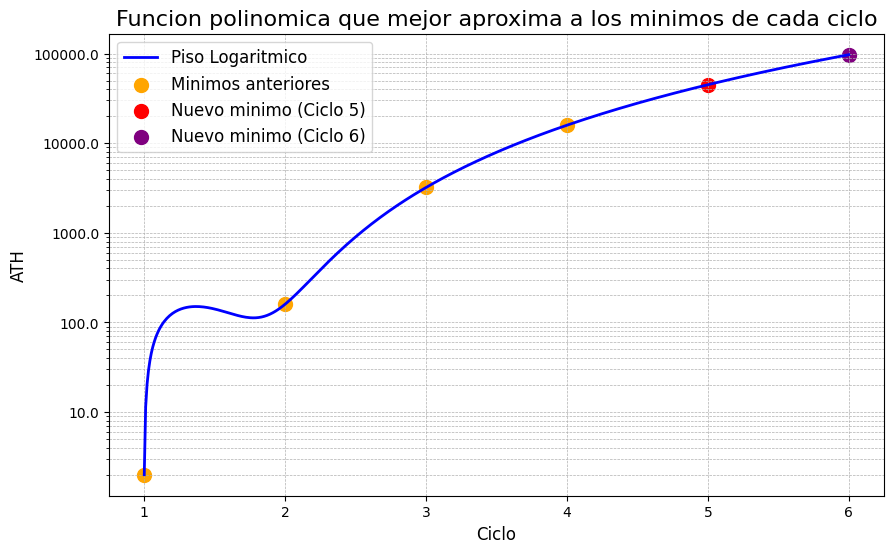

In [363]:
# Generar valores para la curva del polinomio
x_vals = np.linspace(1, 6, 500)  # Valores entre el ciclo 1 y 5
y_vals = poly_cicle_min(x_vals)  # Evaluación del polinomio de minimos

# Graficar ambos polinomios
plt.figure(figsize=(10, 6)) # Tamaño de la gráfica
plt.plot(x_vals, y_vals, label='Piso Logaritmico', color='blue', linewidth=2)  # Línea de máximos
plt.scatter(x, minimos, color='orange', label='Minimos anteriores', s=100)  # Puntos de datos máximos
plt.scatter(5, poly_cicle_min(5), color='red', label='Nuevo minimo (Ciclo 5)', s=100)  # Puntos de datos mínimos
plt.scatter(6, poly_cicle_min(6), color='purple', label='Nuevo minimo (Ciclo 6)', s=100)  # Puntos de datos mínimos

# Etiquetas y diseño
plt.title('Funcion polinomica que mejor aproxima a los minimos de cada ciclo', fontsize=16)
plt.xlabel('Ciclo', fontsize=12)
plt.ylabel('ATH', fontsize=12)

# Aplicar escala logarítmica en el eje Y
plt.yscale('log')
plt.legend(fontsize=12)
plt.grid(True, which="both", linestyle='--', linewidth=0.5)  # Cuadrícula

# Personalizar formato del eje Y
def log_formatter(value, tick_number):
    return f'{value:.1f}'  # Muestra el valor sin notación logarítmica
plt.gca().yaxis.set_major_formatter(FuncFormatter(log_formatter))

plt.show()